# Graphical User Interface for Text Classification and Learning Curve Visualization

This section of the code integrates a graphical user interface (GUI) using the Tkinter library to interactively classify text and visualize learning curves for the trained models. The GUI facilitates user interaction, allowing for real-time classification of new text inputs and displaying performance metrics graphically.

# Key Components and Operations:

1. Library Imports and Setup:
   - The necessary libraries for GUI (Tkinter, matplotlib for plotting within Tkinter), machine learning (scikit-learn for model training and predictions), and text processing (NLTK for tokenization and cleaning) are imported.
   - Wikipedia API is initialized to fetch articles, which may be used for additional features or examples.

2. Downloading NLTK Resources:
   - Essential NLTK resources such as 'punkt' for tokenization, 'stopwords' for cleaning, and 'wordnet' for lemmatization are downloaded to ensure the text processing pipeline functions correctly.

3. Data Preparation and Model Training:
   - Keywords for medical and non-medical categories are defined and used to fetch relevant articles from Wikipedia, which are then cleaned and vectorized using TF-IDF.
   - The dataset is split into training and testing sets, and models (Naive Bayes and Logistic Regression) are trained using the TF-IDF vectors.

4. Dynamic Testing Function with GUI:
   - A function `dynamic_testing_with_gui` is defined to continuously accept user inputs through a dialog box, classify the input using the trained models, and display the predictions (medical or non-medical) in a message box.
   - Users can exit the interaction loop by typing 'exit', which also triggers the learning curve visualization.

5. Learning Curve Visualization:
   - The `plot_learning_curves` function generates learning curves for both models, illustrating how model accuracy changes with increasing training data. This visualization helps in understanding the models' learning behavior and generalization ability.
   - The curves are plotted using matplotlib within a Tkinter window, facilitated by `FigureCanvasTkAgg` for integrating matplotlib plots into the Tkinter GUI framework.

6. Execution:
   - The `dynamic_testing_with_gui` function is called to start the interactive GUI session for classification.
   - After exiting the dynamic testing, the learning curves are plotted by calling the `plot_learning_curves` function, providing a comprehensive view of the training outcomes.

This setup not only aids in evaluating the models in a user-friendly manner but also enhances understanding through visual feedback, making it an effective tool for demonstrations or educational purposes.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


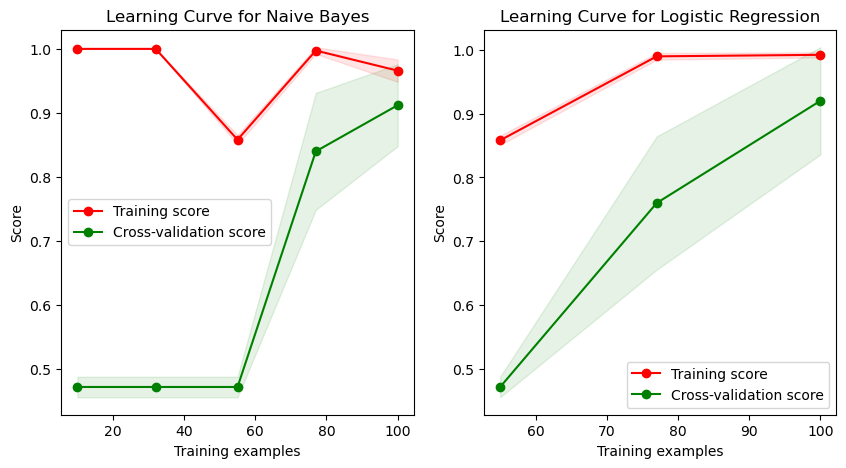

In [7]:
# Importing necessary libraries for GUI
import tkinter as tk
from tkinter import simpledialog, messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Importing other necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import wikipediaapi
import pandas as pd
import nltk
from sklearn.model_selection import learning_curve, train_test_split
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Wikipedia API initialization
wiki_wiki = wikipediaapi.Wikipedia(
    language='en',
    extract_format=wikipediaapi.ExtractFormat.WIKI,
    user_agent="MyWikiApp/1.0 (abhishek.hirve97@gmail.com)"
)

# Function to fetch and clean content from Wikipedia
def fetch_content(title, wiki_wiki):
    page_py = wiki_wiki.page(title)
    content = page_py.text
    return content

# Function to clean text
def clean_text(text):
    tokens = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

# Medical and non-medical keywords
medical_keywords = ["Healthcare", "Cardiology", "Surgery", "Wellness", "Pharmacy", "Immunology",
                    "Pathology", "Pediatrics", "Oncology", "Neurology", "Dentistry", "Vascular",
                    "Orthopedic", "Dermatology", "Endocrinology", "Gastroenterology", "Pulmonology", "Neurosurgery",
                    "Ophthalmology", "Radiology", "Anesthesiology", "Genetics", "Oncologist", "Hematology",
                    "Immunotherapy", "Pediatrician", "Psychiatry", "Dental", "Anatomy",
                    "Physiology", "Biochemistry", "Nutrition", "Disease", "Disorder", "Ailment", "Injury",
                    "Infectious", "Pandemic", "Nurse", "Doctor", "Alzheimer", "Virus", "Operation",
                    "Medical Science", "Clinical", "Therapeutic", "Remedy", "Vaccination", "Treatment",
                    "Medical Profession", "Medical Care", "Medical Treatment", "Medical Practice",
                    "Medical Examination", "Medical Diagnosis", "Medical Condition", "Medical Research","Kidney","Stone"]

non_medical_keywords = ["Art", "Literature", "Philosophy", "Science", "Technology", "Space",
                        "Environment", "Food", "Cuisine", "Recipes", "Cooking", "History", "Ancient_Civilizations",
                        "Archaeology", "Painting", "Sculpture", "Literary", "Fiction", "Poetry", "Philosopher",
                        "Culinary", "Gastronomy", "Recipe", "Culinary", "History", "Historical", "Architectural",
                        "Archaeological", "Civilization", "Culture", "Engineering", "Astronomy", "Cosmology", "Country", "Industry", "Ocean", "Charger", "Battery", "Music", "Dance", "Painting", "Sculpture", "Artistic", "Novel",
                        "Art", "Creative", "Imagination", "Impressionism", "Improvise", "Fictional", "Lyrical",
                        "Entertainment", "Literary Arts", "Creative Arts", "Humanities", "Social Sciences",
                        "Natural Sciences", "Fine Arts", "Visual Arts", "Performing Arts", "Musicology", "Artistry",
                        "Cultural Studies", "Historiography", "Literary Criticism", "Artistic Expression"]


# Fetching and cleaning content
medical_content_list = [fetch_content(keyword, wiki_wiki) for keyword in medical_keywords]
cleaned_medical_content_list = [clean_text(content) for content in medical_content_list]
non_medical_content_list = [fetch_content(keyword, wiki_wiki) for keyword in non_medical_keywords]
cleaned_non_medical_content_list = [clean_text(content) for content in non_medical_content_list]

# Creating DataFrames
medical_data = {"text": cleaned_medical_content_list, "label": ["medical"] * len(medical_content_list)}
non_medical_data = {"text": cleaned_non_medical_content_list, "label": ["non-medical"] * len(non_medical_content_list)}
df = pd.concat([pd.DataFrame(medical_data), pd.DataFrame(non_medical_data)], ignore_index=True)

# Feature Extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])
y = df['label']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)

# Fitting models
nb_tfidf_model = MultinomialNB()
nb_tfidf_model.fit(X_train, y_train)
lr_tfidf_model = LogisticRegression(max_iter=1000)
lr_tfidf_model.fit(X_train, y_train)

# GUI function to get user input
def get_user_input():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    user_input = simpledialog.askstring(title="Text Classifier", prompt="Enter text to classify or 'exit' to quit & get Plots:")
    root.destroy()
    return user_input

# Dynamic testing function with GUI
def dynamic_testing_with_gui():
    user_input = get_user_input()
    while user_input and user_input.lower() != 'exit':
        cleaned_input = clean_text(user_input)
        input_tfidf = tfidf_vectorizer.transform([cleaned_input])
        nb_prediction = nb_tfidf_model.predict(input_tfidf)
        lr_prediction = lr_tfidf_model.predict(input_tfidf)
        result = f"Naive Bayes prediction: {nb_prediction[0]}, Logistic Regression prediction: {lr_prediction[0]}"

        # Show the result in a popup
        result_root = tk.Tk()
        result_root.withdraw()
        messagebox.showinfo("Prediction Results", result)
        result_root.destroy()

        user_input = get_user_input()
        # Function to plot learning curves in the GUI
def plot_learning_curves():
    root = tk.Tk()
    root.title("Learning Curves")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot for Naive Bayes
    train_sizes, train_scores, test_scores = learning_curve(
        nb_tfidf_model, X_tfidf, y, cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax1.set_title("Learning Curve for Naive Bayes")
    ax1.set_xlabel("Training examples")
    ax1.set_ylabel("Score")
    ax1.legend(loc="best")

    # Plot for Logistic Regression
    train_sizes, train_scores, test_scores = learning_curve(
        lr_tfidf_model, X_tfidf, y, cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax2.set_title("Learning Curve for Logistic Regression")
    ax2.set_xlabel("Training examples")
    ax2.set_ylabel("Score")
    ax2.legend(loc="best")

    # Embedding Matplotlib plots into Tkinter
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

    # Tkinter main loop
    tk.mainloop()

# Running the dynamic testing function
dynamic_testing_with_gui()

# After exiting from the dynamic testing, plot learning curves
plot_learning_curves()




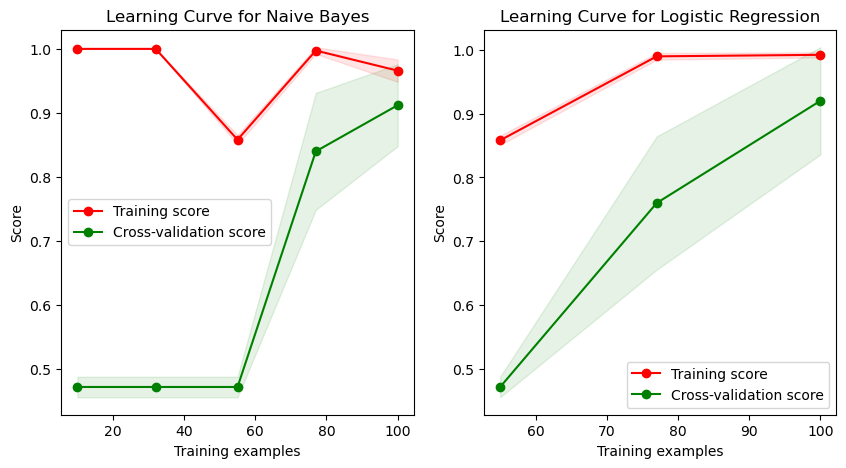